# Machine Learning Multivariate Regression Analysis: Startup Investor Data Set

The most basic building block in machine learning is regression analysis. This notebook I discuss, with python demonstration, the procedure to carry out a machine learning project using regression analysis. I use Housing Price as an example and data set can be downloaded from [here](https://github.com/PacktPublishing/Hands-on-Python-for-Finance/tree/master/Chapter%207).

There are the following steps
- $\textbf{Environment Initiation}$. We first start by importing the packages we need for this project. Then we get data that is already saved in the data folder. Next we set up a model we want to study and we pull the variables from the data we uploaded.
- $\textbf{Machine Learning: Linear Regression}$. Regression analysis plays important role in finance and machine learning. Regression models (both linear and non-linear) are used to predict real values, ex. housing prices, salaries, or stock returns. I am going to discuss the fundamentals of simple regression analysis and we are going to use *sklearn* package to train a regression model in python notebook. Then I discuss the interpretations behind the coefficient and intercept term obtained from regression analysis and how these concepts apply in real life. 
- $\textbf{Machine Learning: Training and Testing}$. It is essential to understand the difference of the performance of machine on existing data and the performance of machine on potential future data. To carry out an unbiased and impartial learning process, it is important to separate training data and testing data so that the observations do not repeat and the performance is robust, consistent, and honest.
- $\textbf{Software Development / Product Management}$. Every data science project has two phases. Phase I is about end-to-end research and select the most optimal machine learning procedure. Phase II is about delivering a software product to consumer and clients so that the python codes can be called and there is no need to redo everything that has already been done.

## Environment Initiation

Let us start by initiating packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('~/OneDrive/Documents/YinsPy/data/startups_Invest.csv')

In [3]:
print(data.head(3))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [4]:
print(data.iloc[:, :-1])

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [5]:
X = data.iloc[:, :-1]
Y = data.iloc[:, 4]
print(X.shape, Y.shape)

(50, 4) (50,)


Notice that we have the column 'State' to be strings and there are different levels for this variable. We need to process this data into a format that the python can read. I use *.get_dummies* to achieve this task.

In [6]:
State = pd.get_dummies(X.iloc[:, 3], drop_first=True)
State.head(3)

,Florida,New York
0,0,1
1,0,0
2,1,0


The code above allows us to take all the states and convert them into dummy variables. For example, instance 0 (the first row) says it is not Florida and it is New York which gives us the power of interpretability in our data set.

Now what we need is to replace the original 'State' variable with out newly defined dummy variables

In [7]:
X.drop('State', axis=1, inplace=True)
X.head(3)
X = pd.concat([X, State], axis=1)
X.head(3)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0


From above code, we have a data set that we want. All the information is preserved and we have all the input to be in format that machine can interpret. 

## Machine Learning: Linear Regression

Now we have dependent variable $Y$ and independent variable $X$. We want to start machine learning. This means we want to train a machine to learn from $X$ and to predict $Y$. In this case, the machine will form some rules $f()$ that we can use. It is written in $f()$ form because it is essentially a map that let us draw inference about $Y$ from $X$. Hence, in mathematical form
$$\hat{Y} := f(X)$$
and this $\hat{Y}$ is estimated value of $Y$.

Notice that in our case the machine is chosen to be linear regression and we can carry out standard linear regression analysis based on the machine we train. 

Also note that this is a machine learning project. We need to separate training set and testing set. This purpose is we want to be impartial and honest about the performance of the linear model on this data set. We separate data into training and testing randomly so that we can construct an environment as if there is new data set arriving for future reference.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35, 5) (35,)
(15, 5) (15,)


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lm.coef_, lm.intercept_)

[7.90840255e-01 3.01968165e-02 3.10148566e-02 4.63028992e+02
 3.04799573e+02] 42403.87087052793


We can make the following interpretation:
- The sets of coefficients $[7.91, 3.02, 3.10, 4.63, 3.04]$ tells us, respectively, when each of the unit of each of the variables changes what is the change on dependent variable, e.g. investment profits.
- The intercept $\$42$k is the constant term at a cirmcumstan where all the variables to be zero. This in real world would not mean much but we can still guess that perhaps that is the bar for this industry or business activities. Once you are in the game the investment profit is going to be, based on data, at least $\$42$k on average.

## Machine Learning: Training Evaluation

We have our model trained. How well does it do on existing data? Let us introduce a metric called Root Mean Square Error (RMSE). It is a metric that measure on average how far away it is from real House Price and predicted House Price. The mathematical form is
$$RMSE := \frac{1}{n} \sum (\hat{Y} - Y)^2$$
and $\hat{Y}$ is the estimated House Price while $Y$ is the real House Price and $n$ is the sample size used for this particular experiment (in this case it is training sample size and later on we are going to use testing sample size).

In [11]:
y_train_pred = lm.predict(X_train)
RMSE_train = (((y_train_pred - y_train)**2).mean())**(0.5)
print('Training Set RMSE is', RMSE_train)

Training Set RMSE is 9466.997852929857


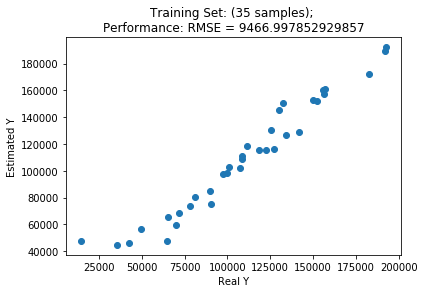

In [12]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Real Y')
plt.ylabel('Estimated Y')
plt.title('Training Set: (' + str(X_train.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_train))
plt.show()

We can see that the RMSE is about $\$9$k and this means that this machine makes guesses based on linear regression model and the predictions are on average +/- $\$9$k away from real values.

## Machine Learning: Prediction

Once we have a trained model from above codes we can move forward to the next step which is prediction. If we have future observations that we like to look at, we can simply pull out the House Size in sq. ft. and use our model to predict what these houses ought to be priced at.

In [13]:
y_pred = lm.predict(X_test)
RMSE_test = (((y_pred - y_test)**2).mean())**(0.5)
print('Testing Set RMSE is', RMSE_test)

Testing Set RMSE is 7867.8551335413895


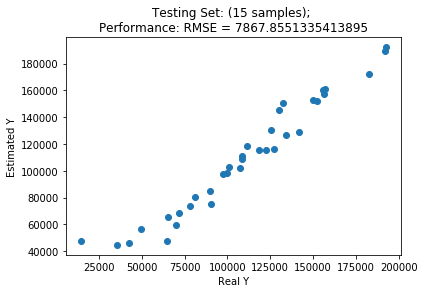

In [14]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Real Y')
plt.ylabel('Estimated Y')
plt.title('Testing Set: (' + str(X_test.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_test))
plt.show()

## Software Development / Product Management

From about analysis, we have established a list of steps we execute to carry out a simple linear regression analysis. Each step is clear written and can be examined for reference. 

Now it is time to pack everything together into a function so that the above analysis can be summarized into a word and can be pulled for future usage without having to code everything again. Once this software is developed we can get the product shipped to employers or clients and we will be starting negotiation as well as software maintainance (which is crucial for product management)

In [15]:
# Define function
def ML_MultiLinearRegression(X, Y, test_set_size):
    # Environment Initiation
    import numpy as np
    import pandas as pd
    from scipy import stats
    import statsmodels.api as sm
    import matplotlib.pyplot as plt

    # ML: Setup
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    
    # ML: Multivariate Linear Regression
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # ML: Training Performance
    y_train_pred = lm.predict(X_train)
    RMSE_train = (((y_train_pred - y_train)**2).mean())**(0.5)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('Real Y')
    plt.ylabel('Estimated Y')
    plt.title('Training Set: (' + str(X_train.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_train))
    plt.show()
    
    # ML: Testing Performance
    y_pred = lm.predict(X_test)
    RMSE_test = (((y_pred - y_test)**2).mean())**(0.5)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('Real Y')
    plt.ylabel('Estimated Y')
    plt.title('Testing Set: (' + str(X_test.shape[0]) + ' samples); \nPerformance: RMSE = ' + str(RMSE_test))
    plt.show()
    
    # Output
    return {
        'Data': {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        },
        'Linear Regression Results': [lm.coef_, lm.intercept_],
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test,
        'Training RMSE': RMSE_train,
        'Testing RMSE': RMSE_test
    }
# End of function

The above lines of code finish up the function and let me run it!

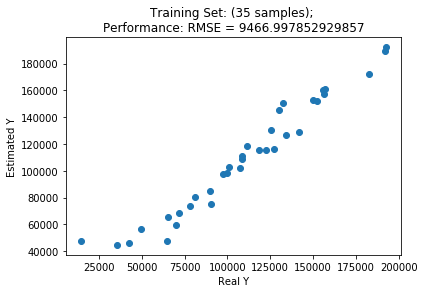

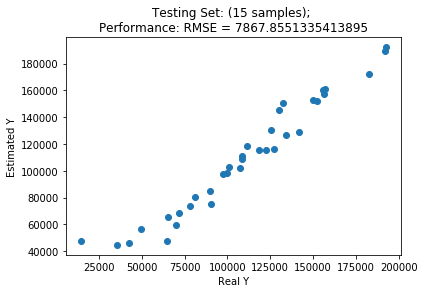

Test Set Performance:  7867.8551335413895


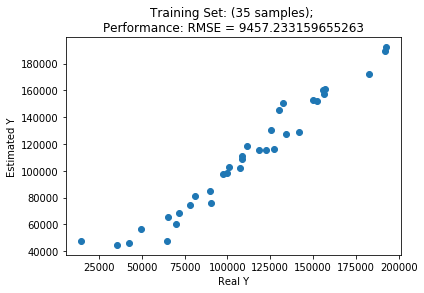

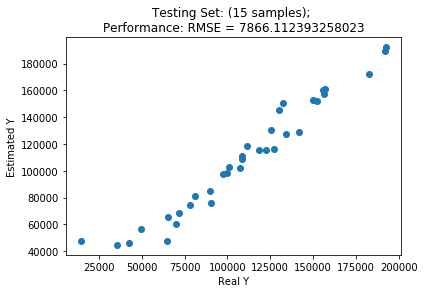

Test Set Performance:  7866.112393258023


In [16]:
# Data
data = pd.read_csv('~/OneDrive/Documents/YinsPy/data/startups_Invest.csv')
X = data.iloc[:, :-1]
Y = data.iloc[:, 4]

# Data Cleanup
State = pd.get_dummies(X.iloc[:, 3], drop_first=True)
State.head(3)
X.drop('State', axis=1, inplace=True)
X.head(3)
X = pd.concat([X, State], axis=1)
X.head(3)

# Run
testresult = ML_MultiLinearRegression(X, Y, 0.5)
print('Test Set Performance: ', testresult['Testing RMSE'])
testresult = ML_MultiLinearRegression(X + X**0.5, Y, 0.5)
print('Test Set Performance: ', testresult['Testing RMSE'])